In [4]:
getwd()
cjb <- read.csv("data/cjb.csv")
library(tidyverse)

[1] "/root/linux_tutorial"

In [5]:
cjb %>%
    filter(bj=="1101") %>%
    select(sx) %>%
    as_vector() -> sx

In [6]:
# stem
stem(sx,scale=1)


  The decimal point is 1 digit(s) to the right of the |

  5 | 5799
  6 | 0014
  6 | 55789
  7 | 000011122334444
  7 | 788899
  8 | 111222334444
  8 | 589
  9 | 224



[1] "list"

[1] "breaks"   "counts"   "density"  "mids"     "xname"    "equidist"

[1] 55 60 65 70 75 80 85 90 95

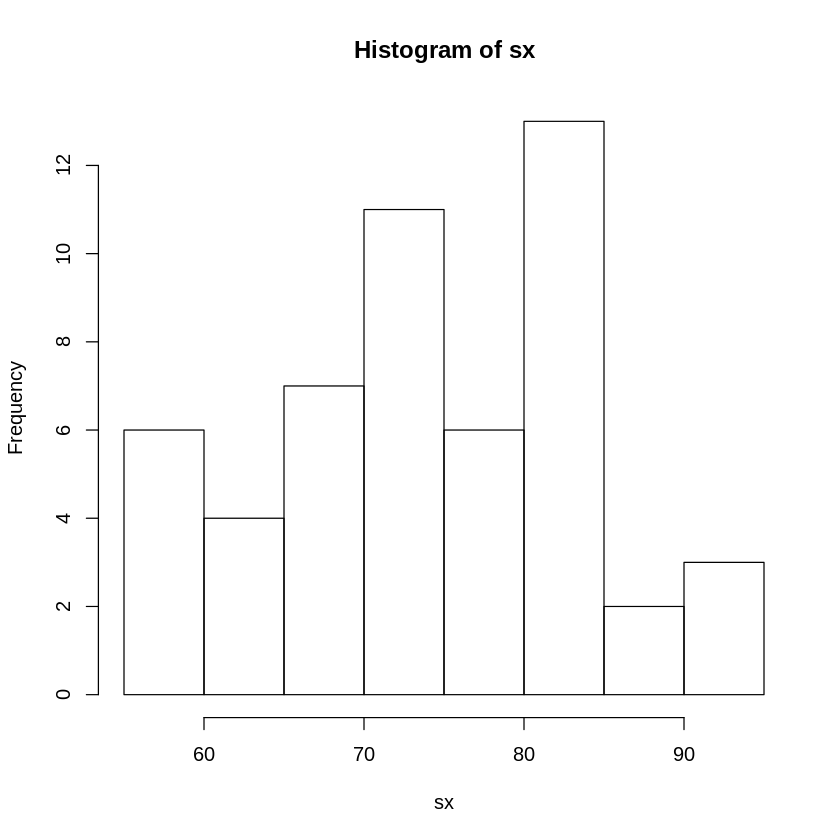

In [7]:
# histogram
sx_hist <- hist(sx)
typeof(sx_hist)
names(sx_hist)
sx_hist$breaks

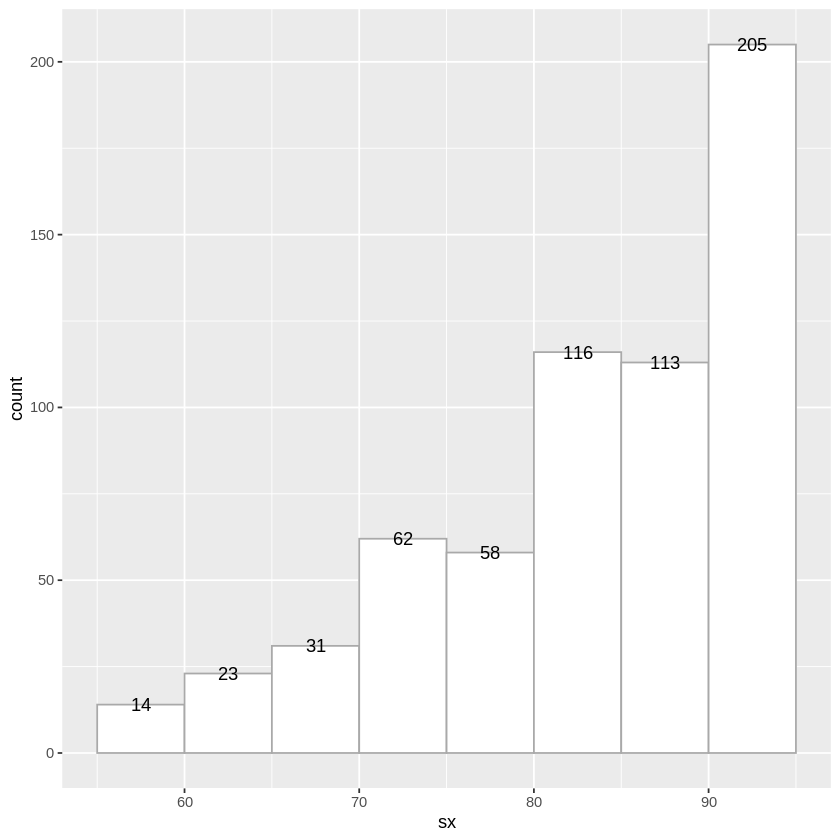

In [8]:
gg1 <- ggplot(cjb,mapping=aes(sx)) +
    geom_histogram(breaks=sx_hist$breaks,color="darkgray",fill="white") +
    stat_bin(breaks = sx_hist$breaks,aes(label = ..count..),geom="text") # 绘制每个柱子上落入区间点的个数
gg1

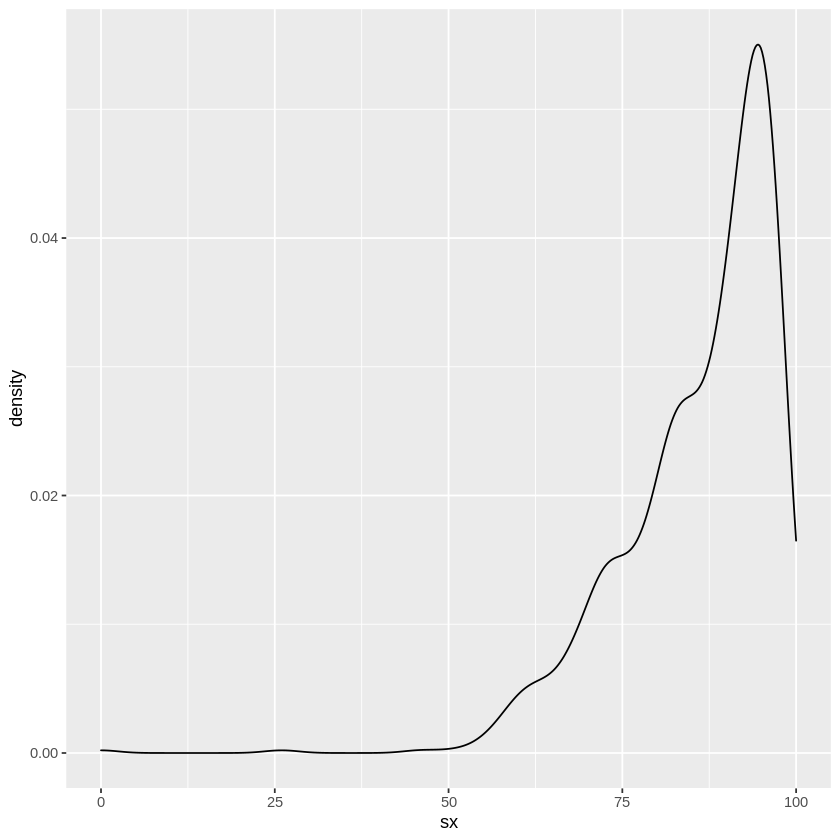

In [9]:
# 添加概率密度曲线 【核密度估计】非参数估计
ggplot(cjb, mapping=aes(sx)) +
    geom_density()

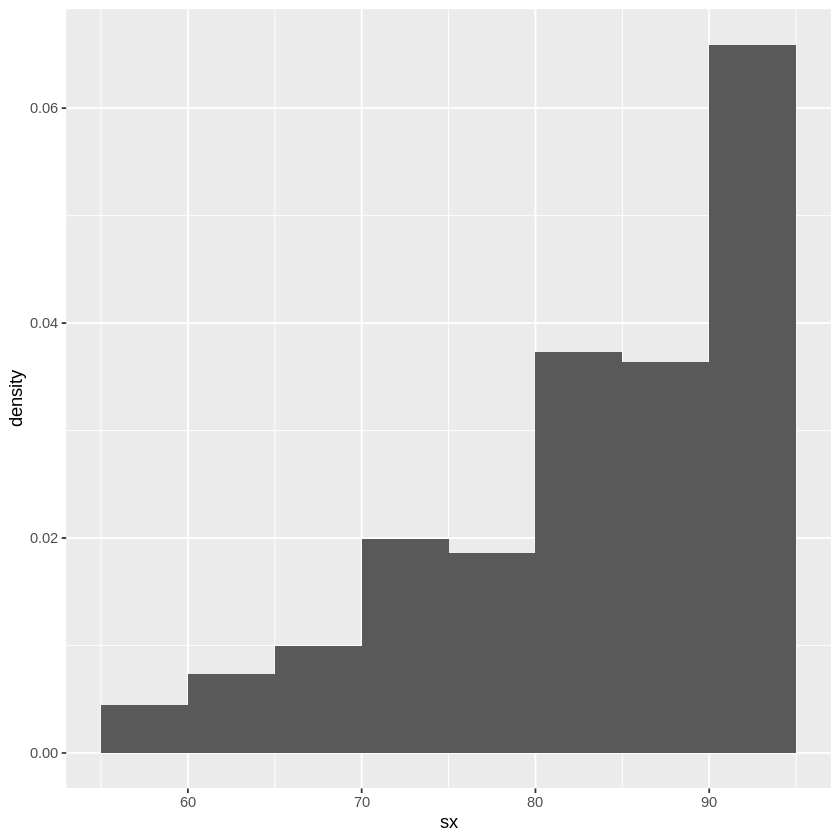

In [10]:
ggplot(cjb,mapping = aes(sx)) + 
    geom_histogram(aes(y=..density..),breaks=sx_hist$breaks)

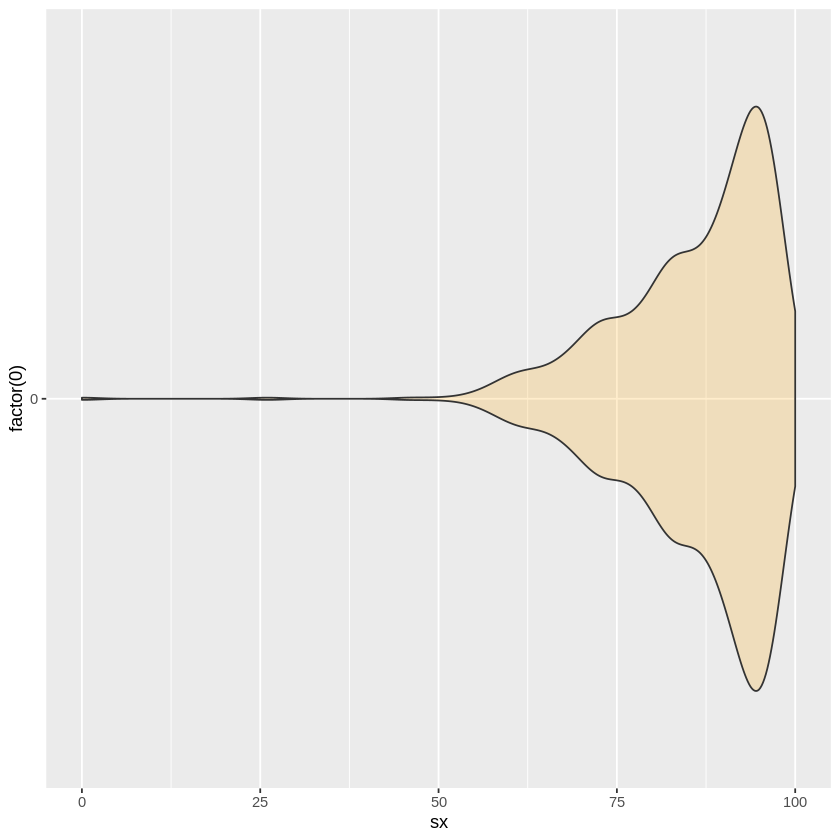

In [11]:
ggplot(cjb, aes(x=factor(0),y=sx)) +
    geom_violin(fill="orange",alpha=0.2)+
    coord_flip()

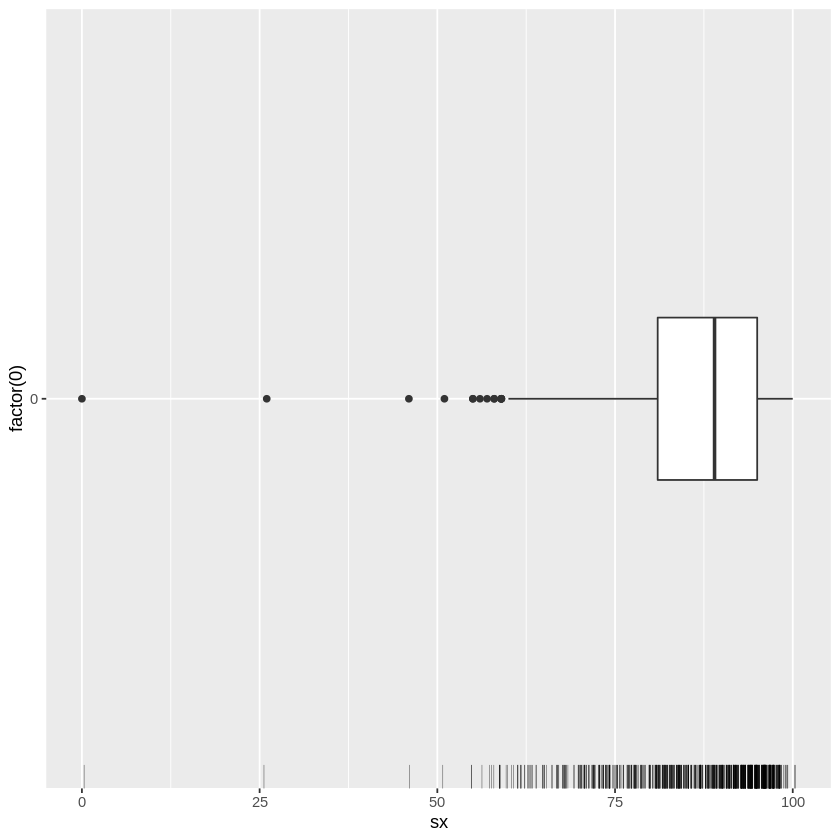

In [12]:
# box plot
ggplot(cjb,mapping=aes(x=sx,y=factor(0))) +
    geom_boxplot(width=0.25) +
    geom_rug(position="jitter",size=0.1,sides="b")

In [17]:
# 定量刻画
cjb %>%
    group_by(wlfk) %>%
    summarise(count=n(),sx_median = median(sx))
#str(cjb)

`summarise()` ungrouping output (override with `.groups` argument)



wlfk,count,sx_median
<fct>,<int>,<dbl>
文科,394,84
理科,381,93


`summarise()` regrouping output by 'wlfk', 'bj' (override with `.groups` argument)



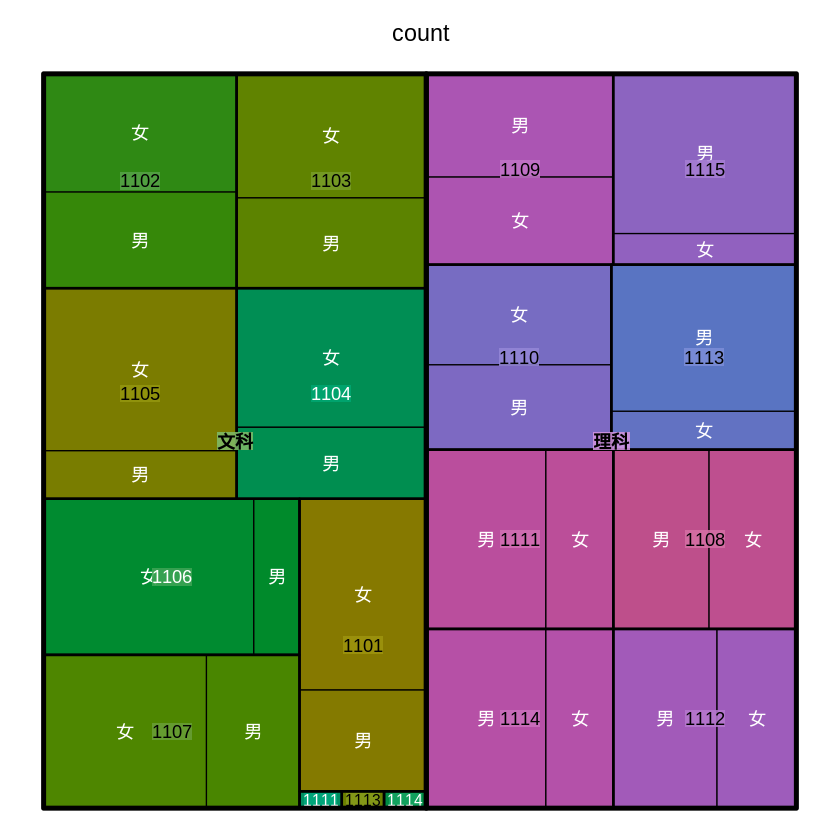

In [24]:
library(treemap)
cjb %>%
    group_by(wlfk,bj,xb) %>%
    summarize(count=n()) %>%
    as.data.frame() %>%
    treemap(index=c("wlfk","bj","xb"),vSize="count",vColor="count")

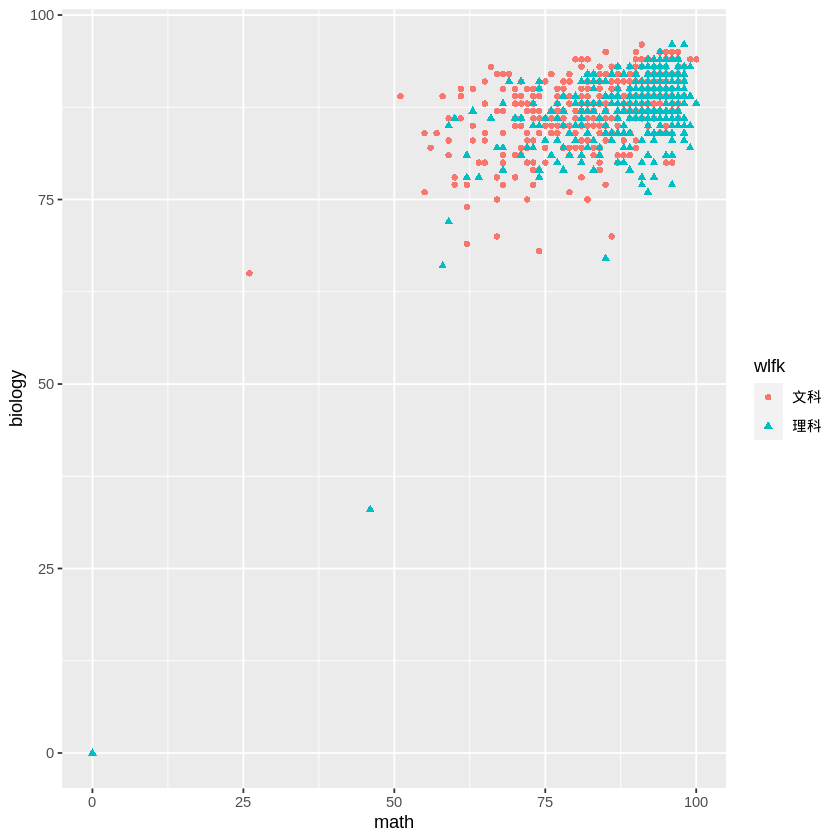

In [15]:
ggplot(cjb,aes(x=sx,y=yw,shape=wlfk,colour=wlfk)) +
    geom_point() +
    labs(x="math",y="biology",color="wlfk",shap="wlfk")

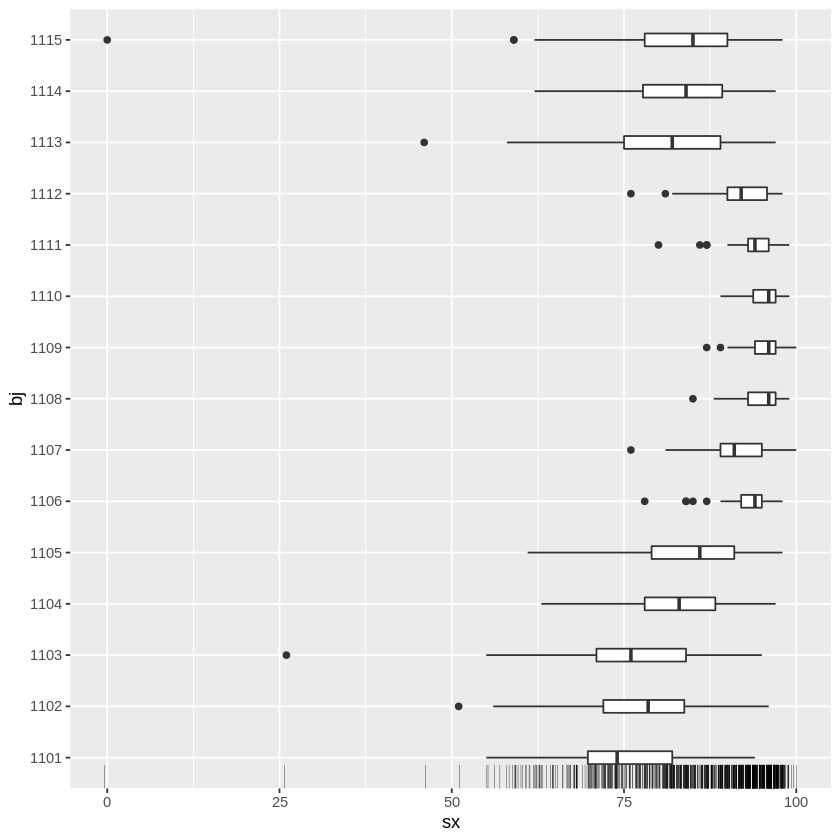

In [43]:
#str(cjb)
cjb$bj <- factor(cjb$bj)
# box plot
ggplot(cjb,mapping=aes(x=sx,y=bj)) +
    geom_boxplot(width=0.25) +  
    geom_rug(position="jitter",size=0.1,sides="b")

In [28]:
# 计算相关系数
(cor_coef <- cor(cjb[,4:12]))    

,yw,sx,wy,zz,ls,dl,wl,hx,sw
yw,1.0000000,0.5275622,0.6343962,0.6339136,0.5038723,0.5622957,0.3714660,0.5102571,0.5066079
sx,0.5275622,1.0000000,0.5985397,0.4671338,0.4407582,0.5137006,0.5941902,0.6293725,0.6363385
wy,0.6343962,0.5985397,1.0000000,0.5173889,0.3949008,0.5178676,0.5094190,0.5300015,0.5230702
zz,0.6339136,0.4671338,0.5173889,1.0000000,0.5201440,0.5465269,0.2911337,0.4393481,0.4174589
ls,0.5038723,0.4407582,0.3949008,0.5201440,1.0000000,0.5297196,0.3706790,0.4336043,0.4675118
dl,0.5622957,0.5137006,0.5178676,0.5465269,0.5297196,1.0000000,0.4455963,0.5610122,0.5552716
wl,0.3714660,0.5941902,0.5094190,0.2911337,0.3706790,0.4455963,1.0000000,0.6431052,0.6701676
hx,0.5102571,0.6293725,0.5300015,0.4393481,0.4336043,0.5610122,0.6431052,1.0000000,0.7298152
sw,0.5066079,0.6363385,0.5230702,0.4174589,0.4675118,0.5552716,0.6701676,0.7298152,1.0000000


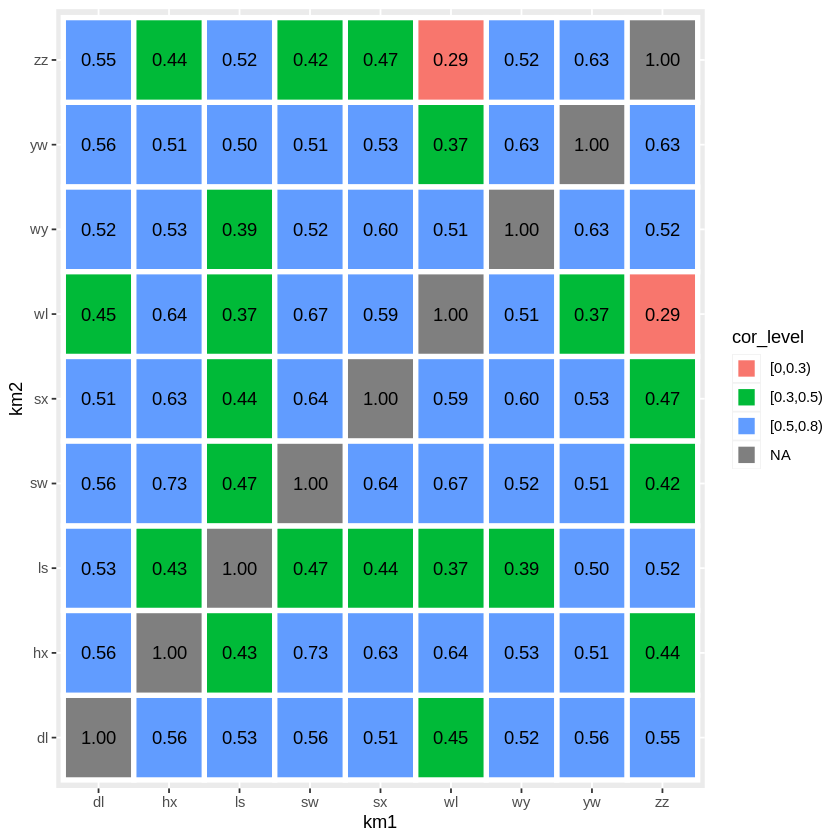

In [41]:
cor_coef %>%
    as.data.frame() %>%
    rownames_to_column(var="km1") %>%
    gather(key=km2, value=cor_num, -km1) %>%
    mutate(cor_level=cut(cor_num,breaks=c(0,0.3,0.5,0.8,1),right=F)) %>%
    ggplot(aes(x=km1, y=km2,fill=cor_level))+
    geom_tile(color="white",size=1.5)+
    geom_text(aes(label=format(cor_num,digits=2)))

In [46]:
cbind(cjb,cjb)[,2:5]

bj,xb,yw,sx
<fct>,<fct>,<int>,<int>
1101,女,94,82
1101,男,87,94
1101,男,92,79
1101,女,91,84
1101,男,85,92
1101,女,92,82
1101,女,88,72
1101,男,81,89
1101,女,88,77
